Section 1) Problem description

In this assignment you will get to practice with a very simple neural network implementation from scratch. This neural network, will have to learn what the important features are in the data to produce the output. In particular, this neural net will be given an input matrix of zeros and ones. The output to each sample will be a single one or zero. The output will be determined by the number in the first feature column of the data samples.

Section 2) This is your starting code for this assignment

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# Fetch Data
url ="https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv"
df=pd.read_csv(url,encoding="unicode_escape")
df

,input1,input2,input3,output
0,0,0,1,0
1,0,1,1,0
2,1,0,1,1
3,1,0,0,1


In [2]:
# Input Funtion
def ColumnToArray_Input(dataframe):
      
    global column_to_list_input
    column_to_list_input=[]

    for i in range(len(df)):
        # appending data to new list 
        column_to_list_input.append(list(df.iloc[i][:3]))
    return column_to_list_input

# Output Function 
def ColumnToArray_Output(dataframe):
      
    global column_to_list_output
    column_to_list_output=[]

    for i in range(len(df)):
        # appending data to new list 
        column_to_list_output.append(list(df.iloc[i][-1:]))
    return column_to_list_output

# Input Funtion
ColumnToArray_Input(df)

[[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0]]

In [3]:
# Output Funtion
ColumnToArray_Output(df)

[[0], [0], [1], [1]]

Section 3) Determine the number of epochs needed to achieve 99% prediction accuracy. Manipulate the plot to clearly show this

[[0.35392403]]  - Correct:  0
[[0.38816427]]  - Correct:  0


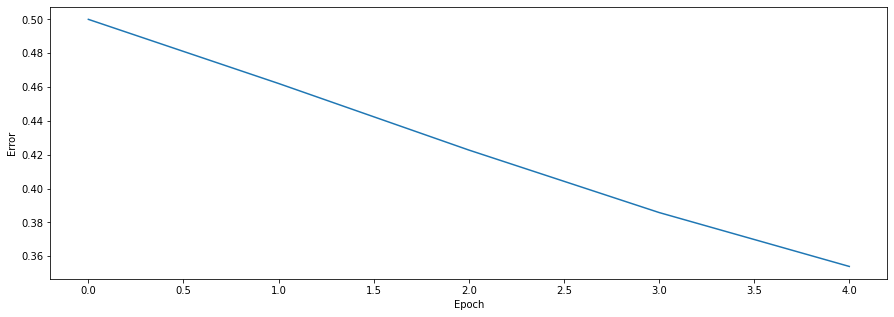

In [9]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 5 iterations
    def train(self, epochs=5):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 1, 1]])
example_2 = np.array([[0, 0, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list,NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

[[0.07339768]]  - Correct:  0
[[0.17450879]]  - Correct:  0


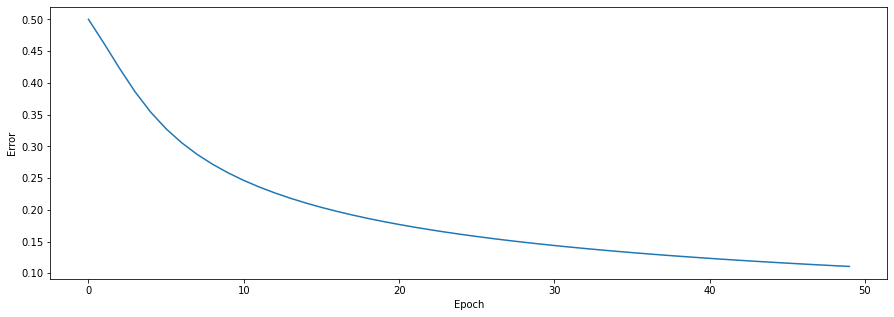

In [10]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 50 iterations
    def train(self, epochs=50):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 1, 1]])
example_2 = np.array([[0, 0, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list,NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

[[0.02380952]]  - Correct:  0
[[0.08107413]]  - Correct:  0


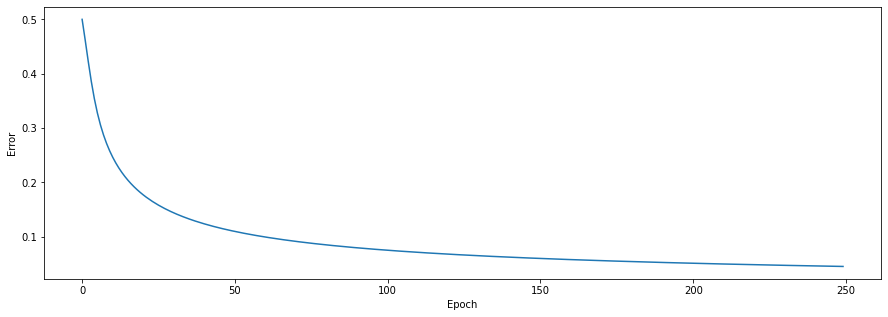

In [11]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 250 iterations
    def train(self, epochs=250):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 1, 1]])
example_2 = np.array([[0, 0, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list,NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

the number of epochs needed to achieve 99% prediction accuracy is 250

Section 4) Change the prediction function to use a softmax activation function instead of sigmoid and determine the number of epochs needed to achieve 99% prediction accuracy with the new prediction function. Manipulate the plot to clearly show this

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


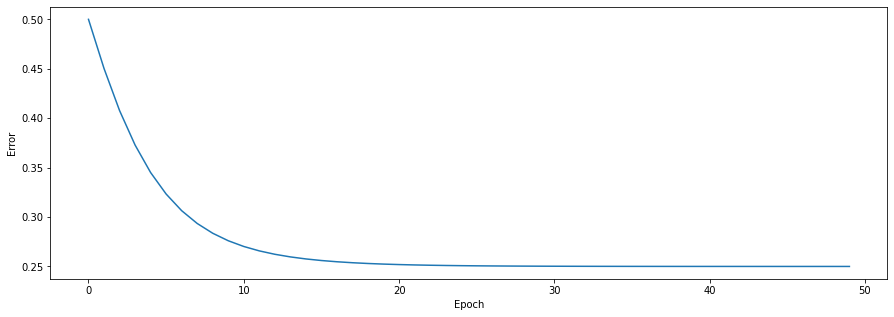

In [12]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 50 iterations
    def train(self, epochs=50):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


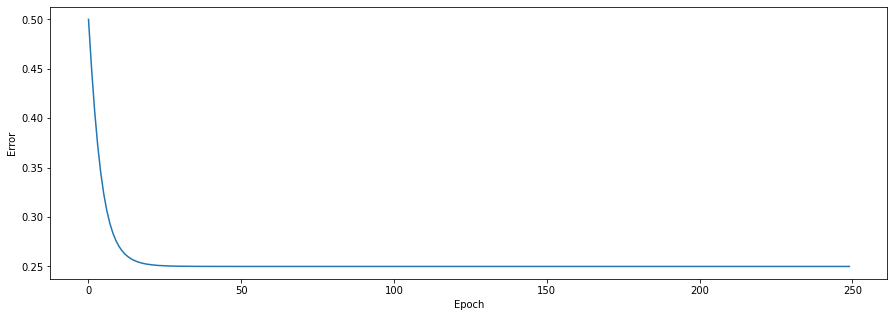

In [14]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 250 iterations
    def train(self, epochs=250):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


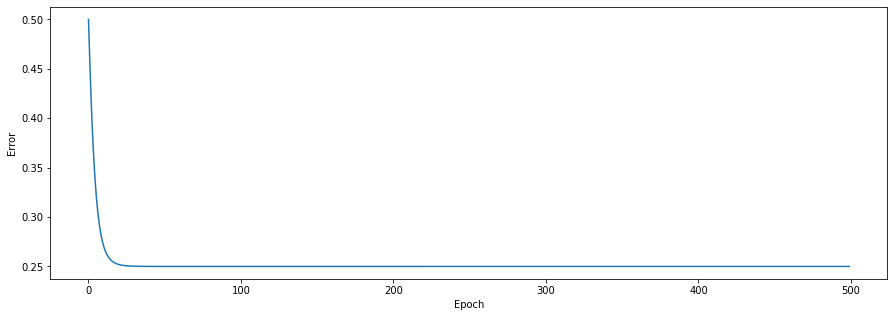

In [15]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 500 iterations
    def train(self, epochs=500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


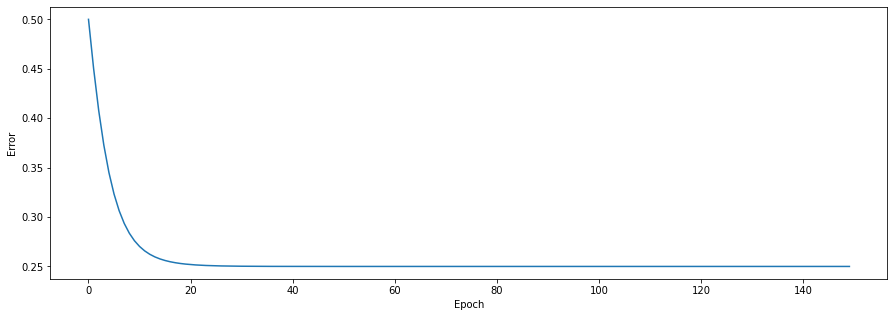

In [16]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 150 iterations
    def train(self, epochs=150):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


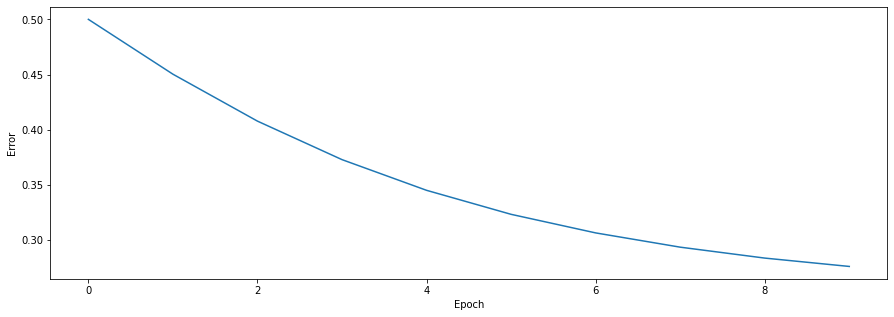

In [17]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 10 iterations
    def train(self, epochs=10):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


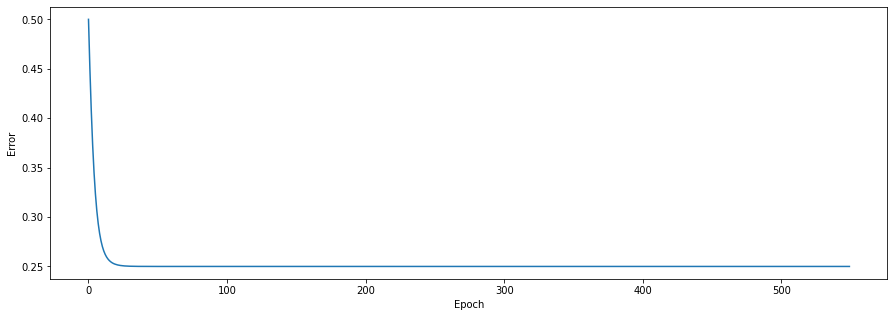

In [18]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 550 iterations
    def train(self, epochs=550):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


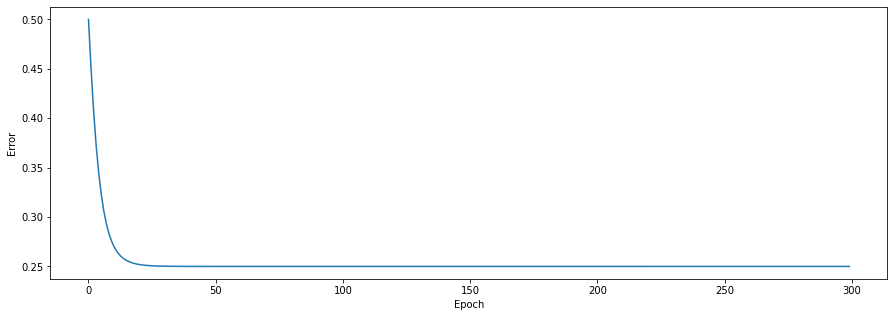

In [19]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 300 iterations
    def train(self, epochs=300):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


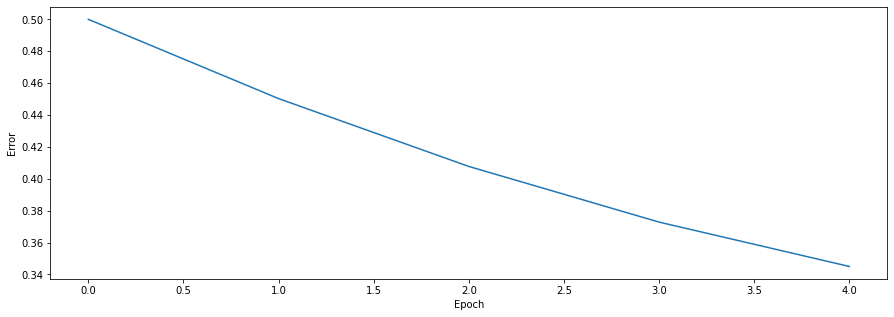

In [20]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 5 iterations
    def train(self, epochs=5):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


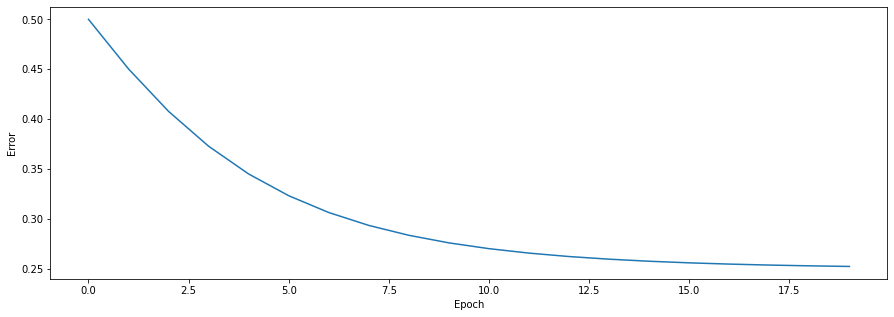

In [21]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 20 iterations
    def train(self, epochs=20):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


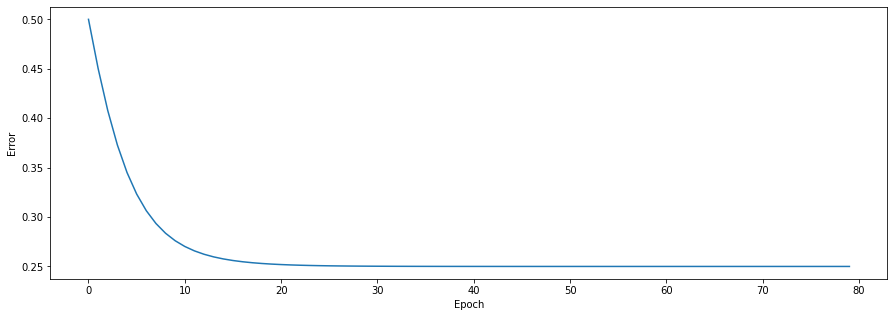

In [22]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 80 iterations
    def train(self, epochs=80):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


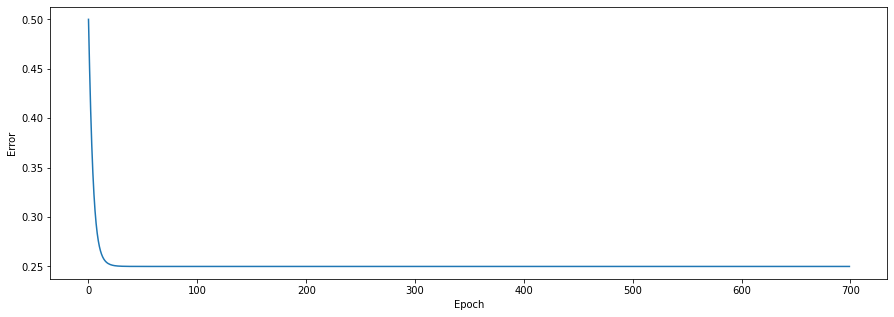

In [23]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 700 iterations
    def train(self, epochs=700):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1


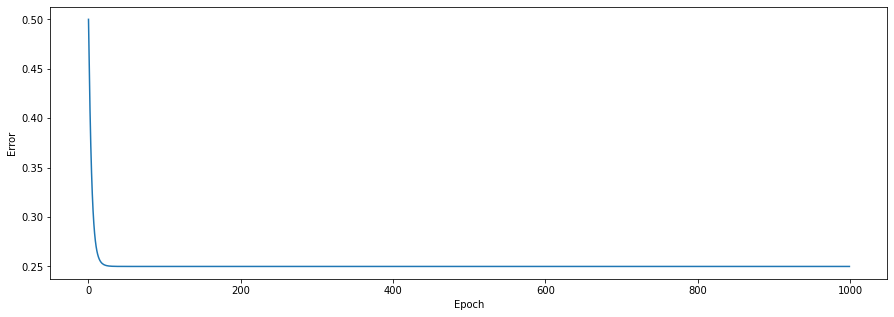

In [24]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 1000 iterations
    def train(self, epochs=1000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


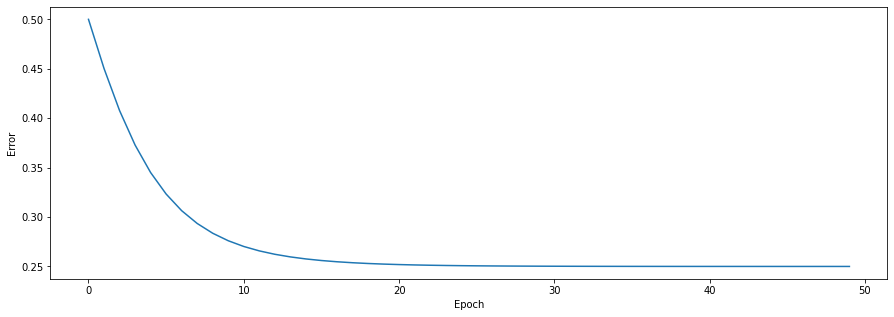

In [25]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 50 iterations
    def train(self, epochs=50):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


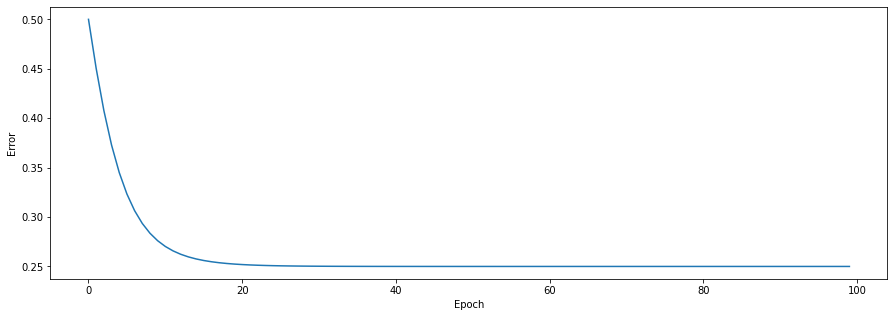

In [26]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 100 iterations
    def train(self, epochs=100):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


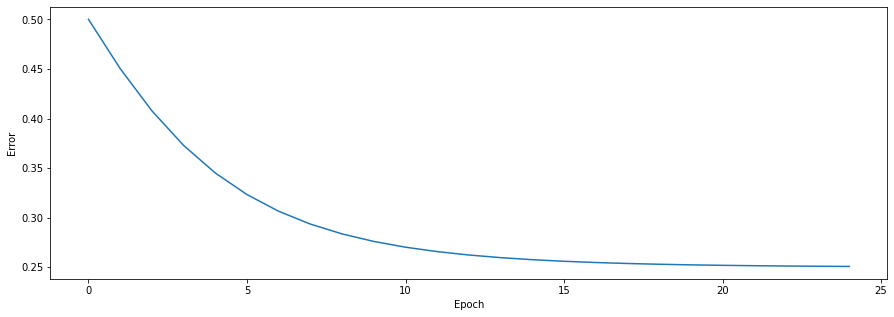

In [27]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 25 iterations
    def train(self, epochs=25):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


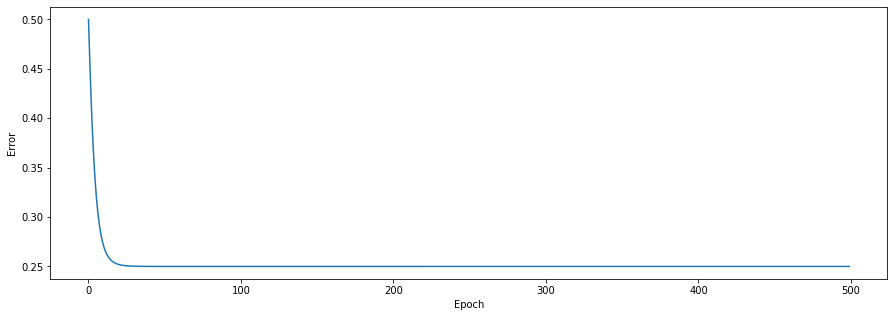

In [28]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 500 iterations
    def train(self, epochs=500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


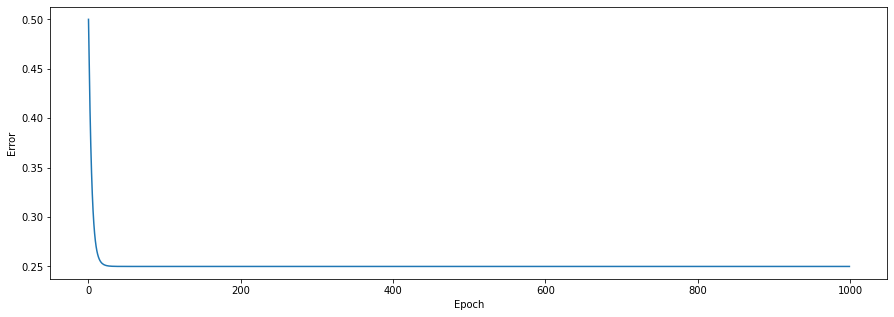

In [29]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 1000 iterations
    def train(self, epochs=1000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


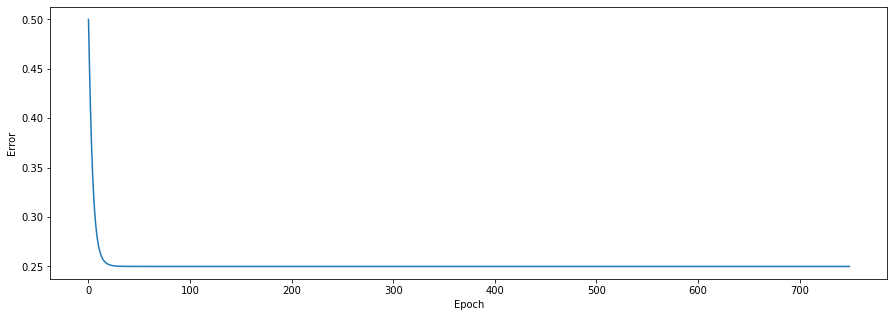

In [30]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 750 iterations
    def train(self, epochs=750):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


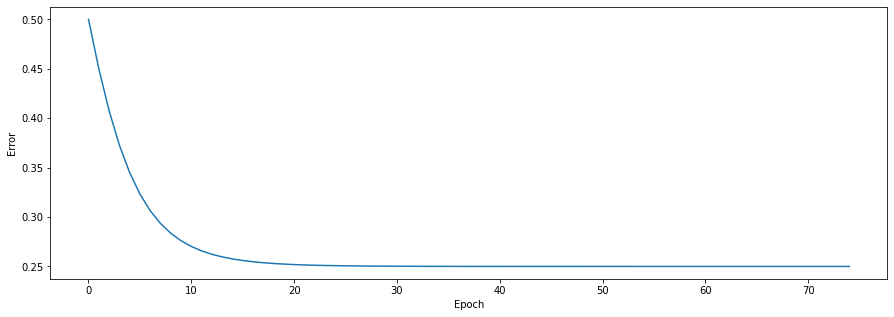

In [31]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 75 iterations
    def train(self, epochs=75):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


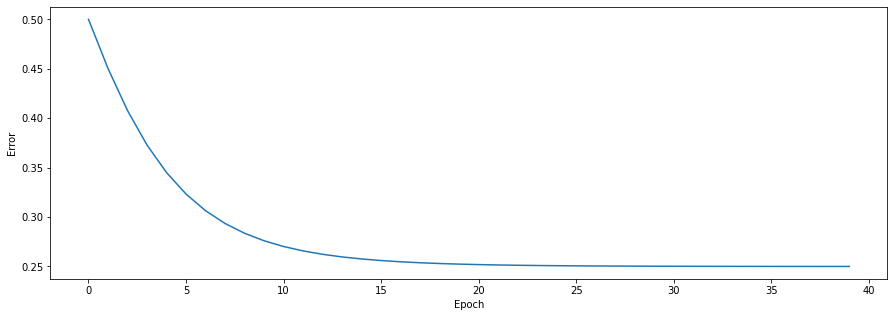

In [32]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 40 iterations
    def train(self, epochs=40):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


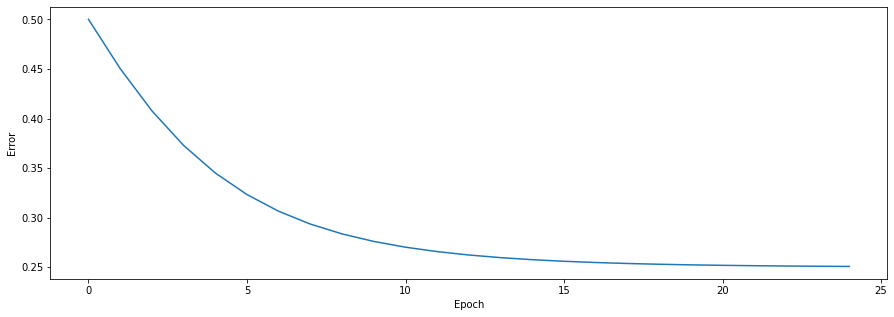

In [33]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 25 iterations
    def train(self, epochs=25):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


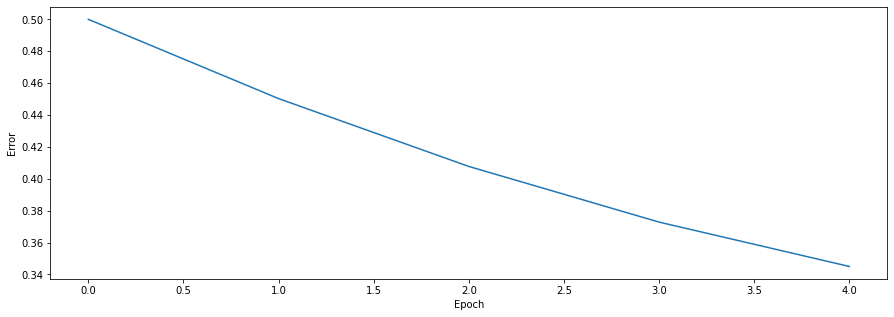

In [34]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 5 iterations
    def train(self, epochs=5):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


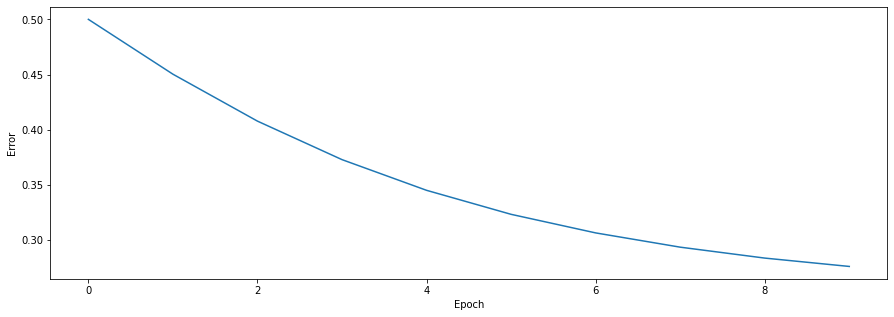

In [35]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 10 iterations
    def train(self, epochs=10):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


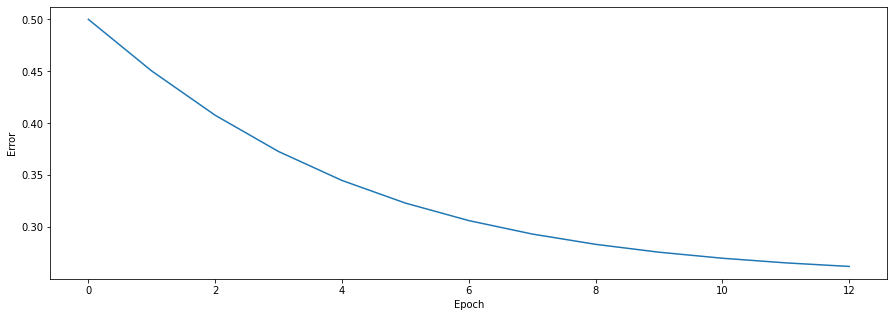

In [36]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 13 iterations
    def train(self, epochs=13):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


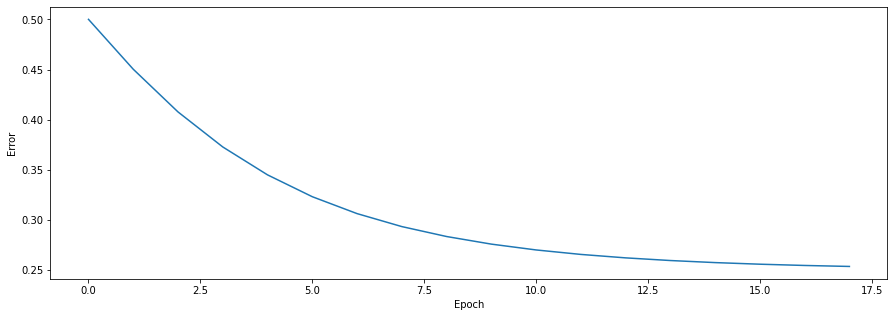

In [37]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 18 iterations
    def train(self, epochs=18):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


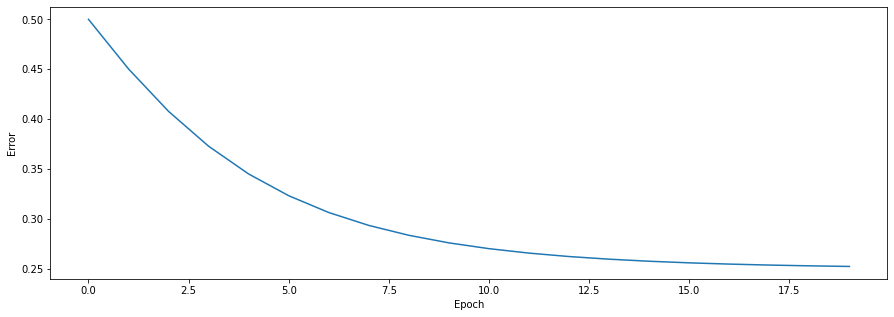

In [38]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 20 iterations
    def train(self, epochs=20):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


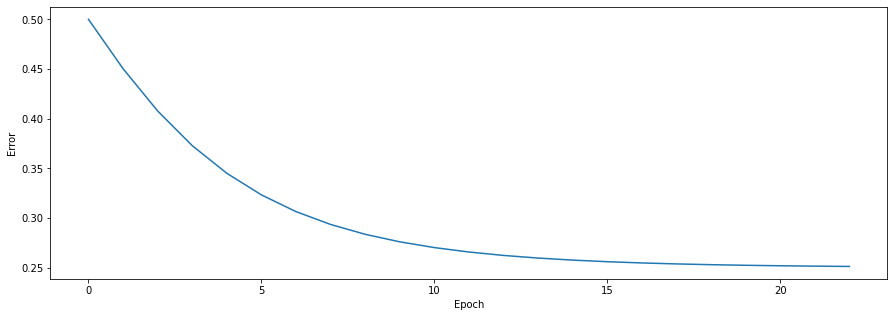

In [39]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 23 iterations
    def train(self, epochs=23):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


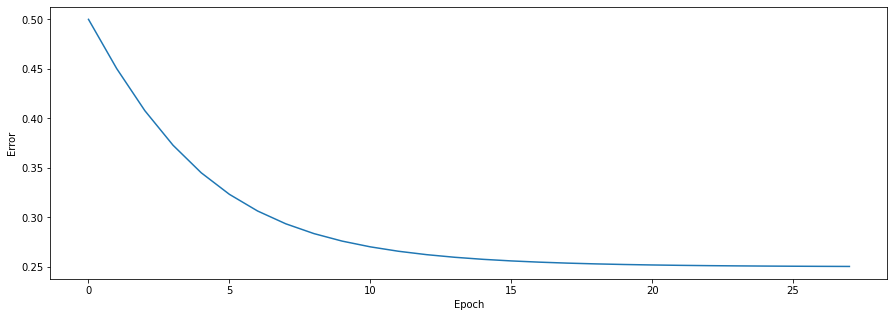

In [40]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 28 iterations
    def train(self, epochs=28):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


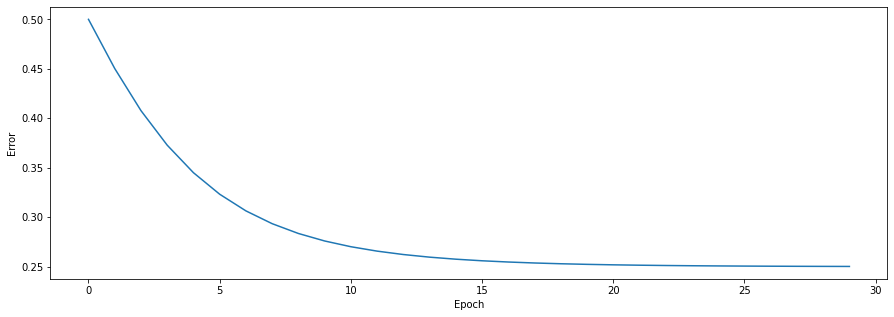

In [41]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 30 iterations
    def train(self, epochs=30):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


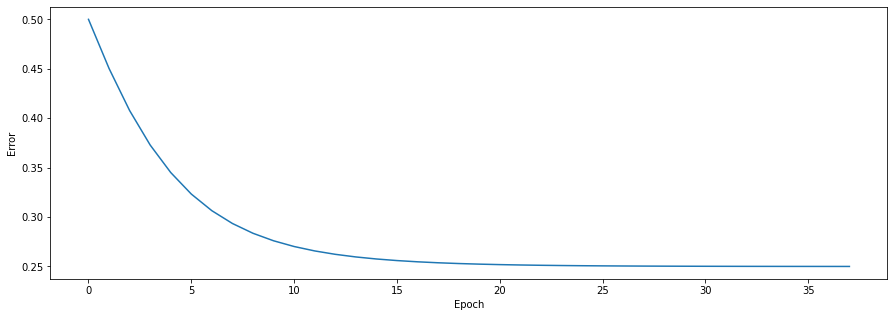

In [42]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 38 iterations
    def train(self, epochs=38):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


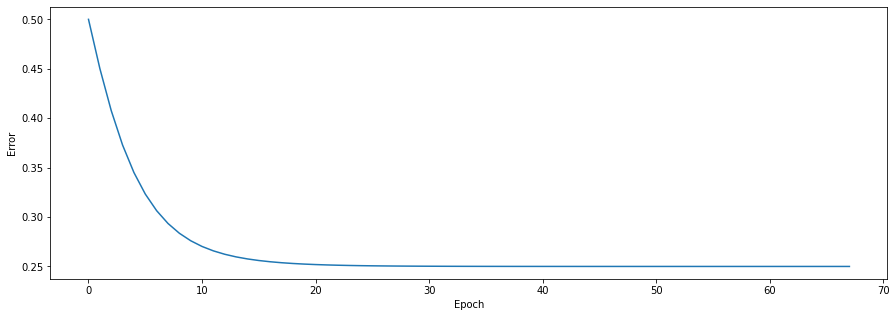

In [43]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 68 iterations
    def train(self, epochs=68):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


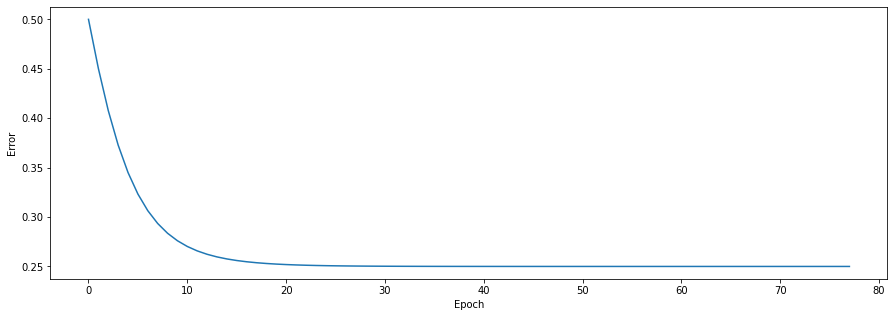

In [44]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 78 iterations
    def train(self, epochs=78):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


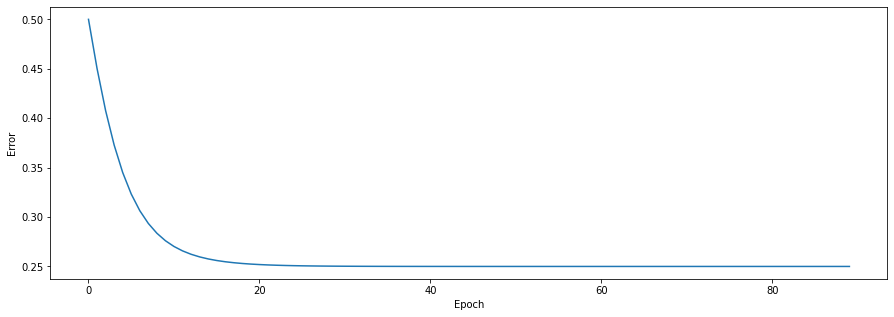

In [45]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 90 iterations
    def train(self, epochs=90):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


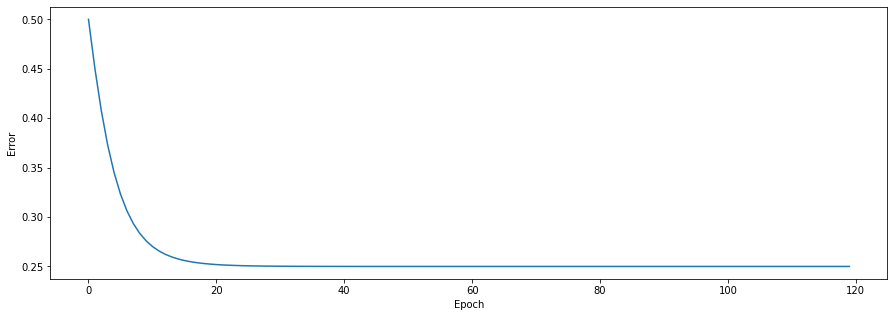

In [46]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 120 iterations
    def train(self, epochs=120):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


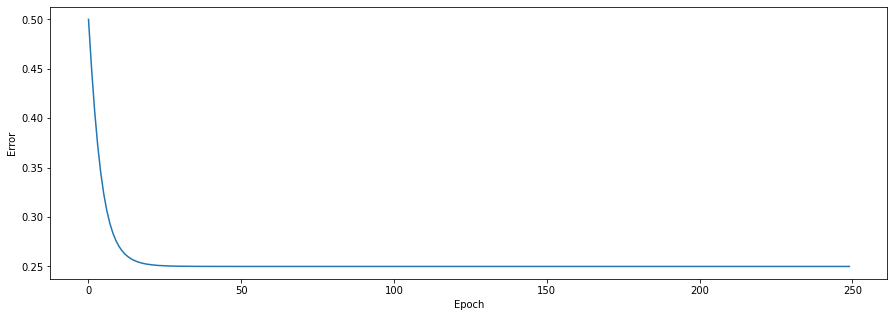

In [47]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 250 iterations
    def train(self, epochs=250):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


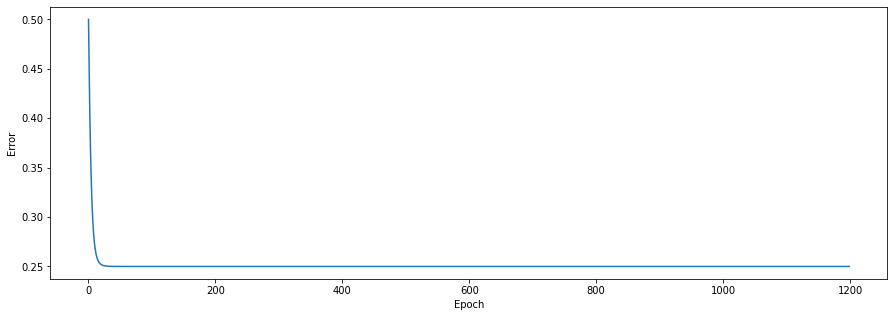

In [49]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 1200 iterations
    def train(self, epochs=1200):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


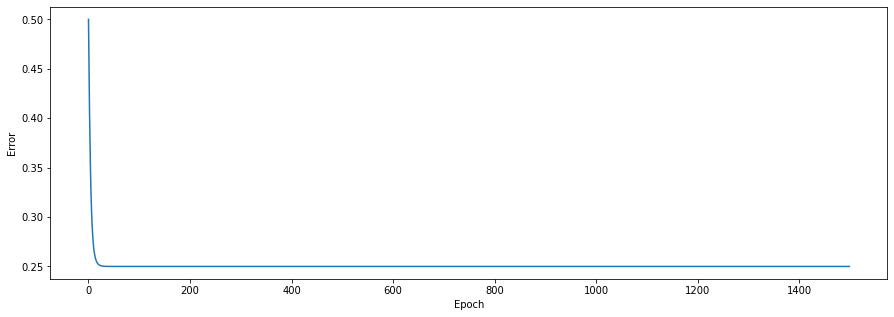

In [50]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 1500 iterations
    def train(self, epochs=1500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


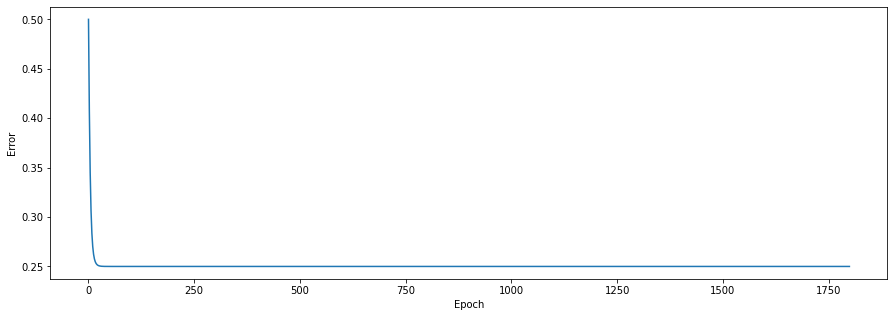

In [51]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 1800 iterations
    def train(self, epochs=1800):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


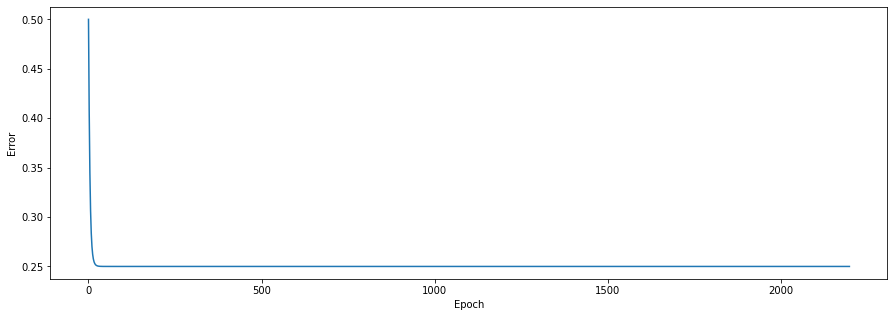

In [52]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 2200 iterations
    def train(self, epochs=2200):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


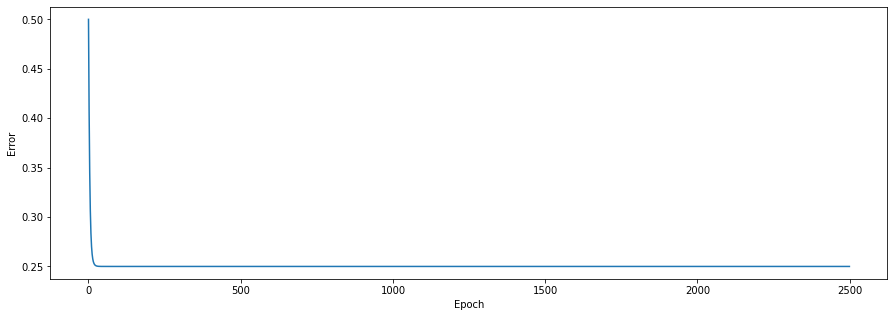

In [53]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 2500 iterations
    def train(self, epochs=2500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


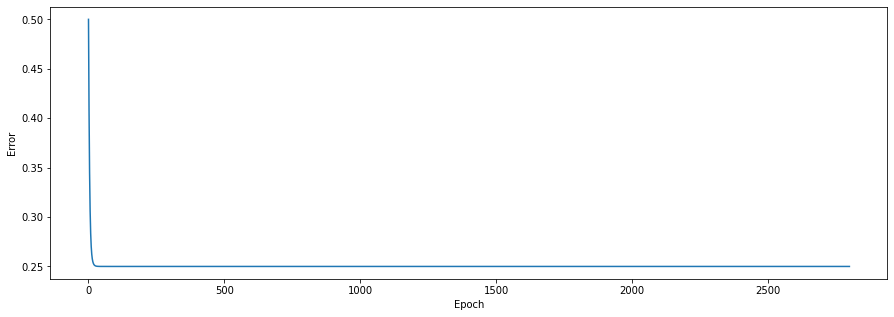

In [54]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 2800 iterations
    def train(self, epochs=2800):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


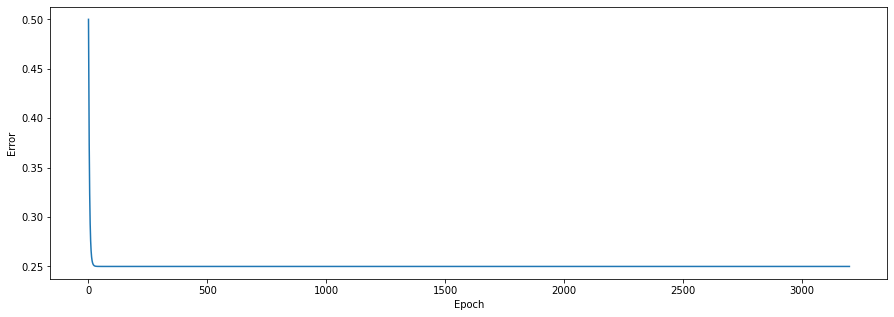

In [55]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 3200 iterations
    def train(self, epochs=3200):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


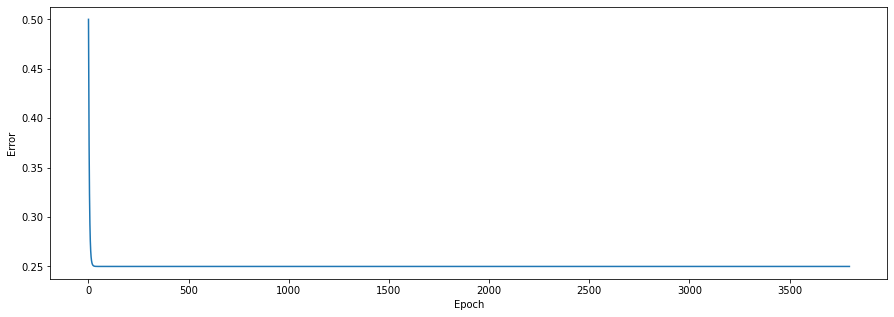

In [56]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 3800 iterations
    def train(self, epochs=3800):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

(0, array([[1.]]))  - Correct:  0
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1
(1, array([[1.]]))  - Correct:  1


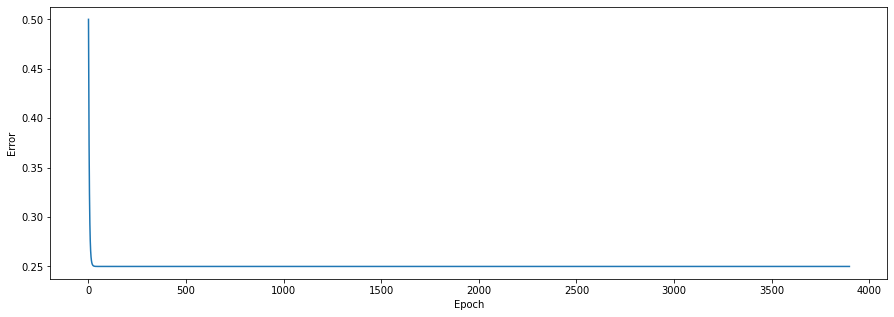

In [59]:
# input data
input = np.array(ColumnToArray_Input(df))

# output data
output = np.array(ColumnToArray_Output(df))

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, input, output):
        self.input  = input
        self.output = output
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = e^/sum(e^x)
    def softmax(self, x):
      return np.exp(x)/np.sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.input, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.output - self.hidden
        delta = self.error * self.softmax(self.hidden)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 3900 iterations
    def train(self, epochs=3900):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        probability = self.softmax(np.dot(new_input, self.weights))
        if probability == 1.0:
          prediction=new_input[0][0]
        return prediction,probability

# create neural network   
NN = NeuralNetwork(input, output)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[0, 0, 1]])
example_2 = np.array([[1, 1, 1]])
example_3 = np.array([[1, 0, 1]])
example_4 = np.array([[1, 0, 0]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])
print(NN.predict(example_3), ' - Correct: ', example_3[0][0])
print(NN.predict(example_4), ' - Correct: ', example_4[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Feedback from Professor Sanchez

PLEASE (and specially with Capstone part 3 coming up) make sure you work in those visualizations, covered in lecture:
- Add title
- Improve scales, specially when working in something where you are being asked for 95% or greater performance and if you use 10% increments, then it's harder to determine your results visually. 
- This submission was so unnecesarily long and with practically no documentation. The whole purpose of using notebooks is to combine code, tests, results and documenation, leverage this for clarity !